# Proyecto final: Optimización del Índice de Felicidad Urbana mediante Aprendizaje por Refuerzo y Sistemas Neurodifusos

Integrantes:


*   Brenda Guzmán
*   María Merino
*   Marly Márquez



## Dataset

In [ ]:
# montar drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# cargar datos de carpeta happiness
df_test = pd.read_csv('/content/drive/MyDrive/happiness/test.csv')
df = pd.read_csv('/content/drive/MyDrive/happiness/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


### EDA

In [ ]:
# describe
df.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2026.082569,56.779817,1085.366972,38.036697,-44.865505,30.458716,93.086239
std,1.652363,6.856402,756.993165,36.300656,42.407240,21.082180,10.550034
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,385.000000,25.000000,-82.100000,20.000000,95.000000
50%,2026.000000,55.000000,1065.000000,30.000000,-41.300000,25.000000,96.000000
75%,2027.000000,60.000000,1745.000000,35.000000,-0.500000,25.000000,97.000000
max,2029.000000,90.000000,2425.000000,245.000000,8.600000,130.000000,99.000000


In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Decibel_Level'}>,
        <Axes: title={'center': 'Green_Space_Area'}>],
       [<Axes: title={'center': 'Air_Quality_Index'}>,
        <Axes: title={'center': 'Happiness_Score'}>,
        <Axes: title={'center': 'Cost_of_Living_Index'}>],
       [<Axes: title={'center': 'Healthcare_Index'}>, <Axes: >, <Axes: >]],
      dtype=object)

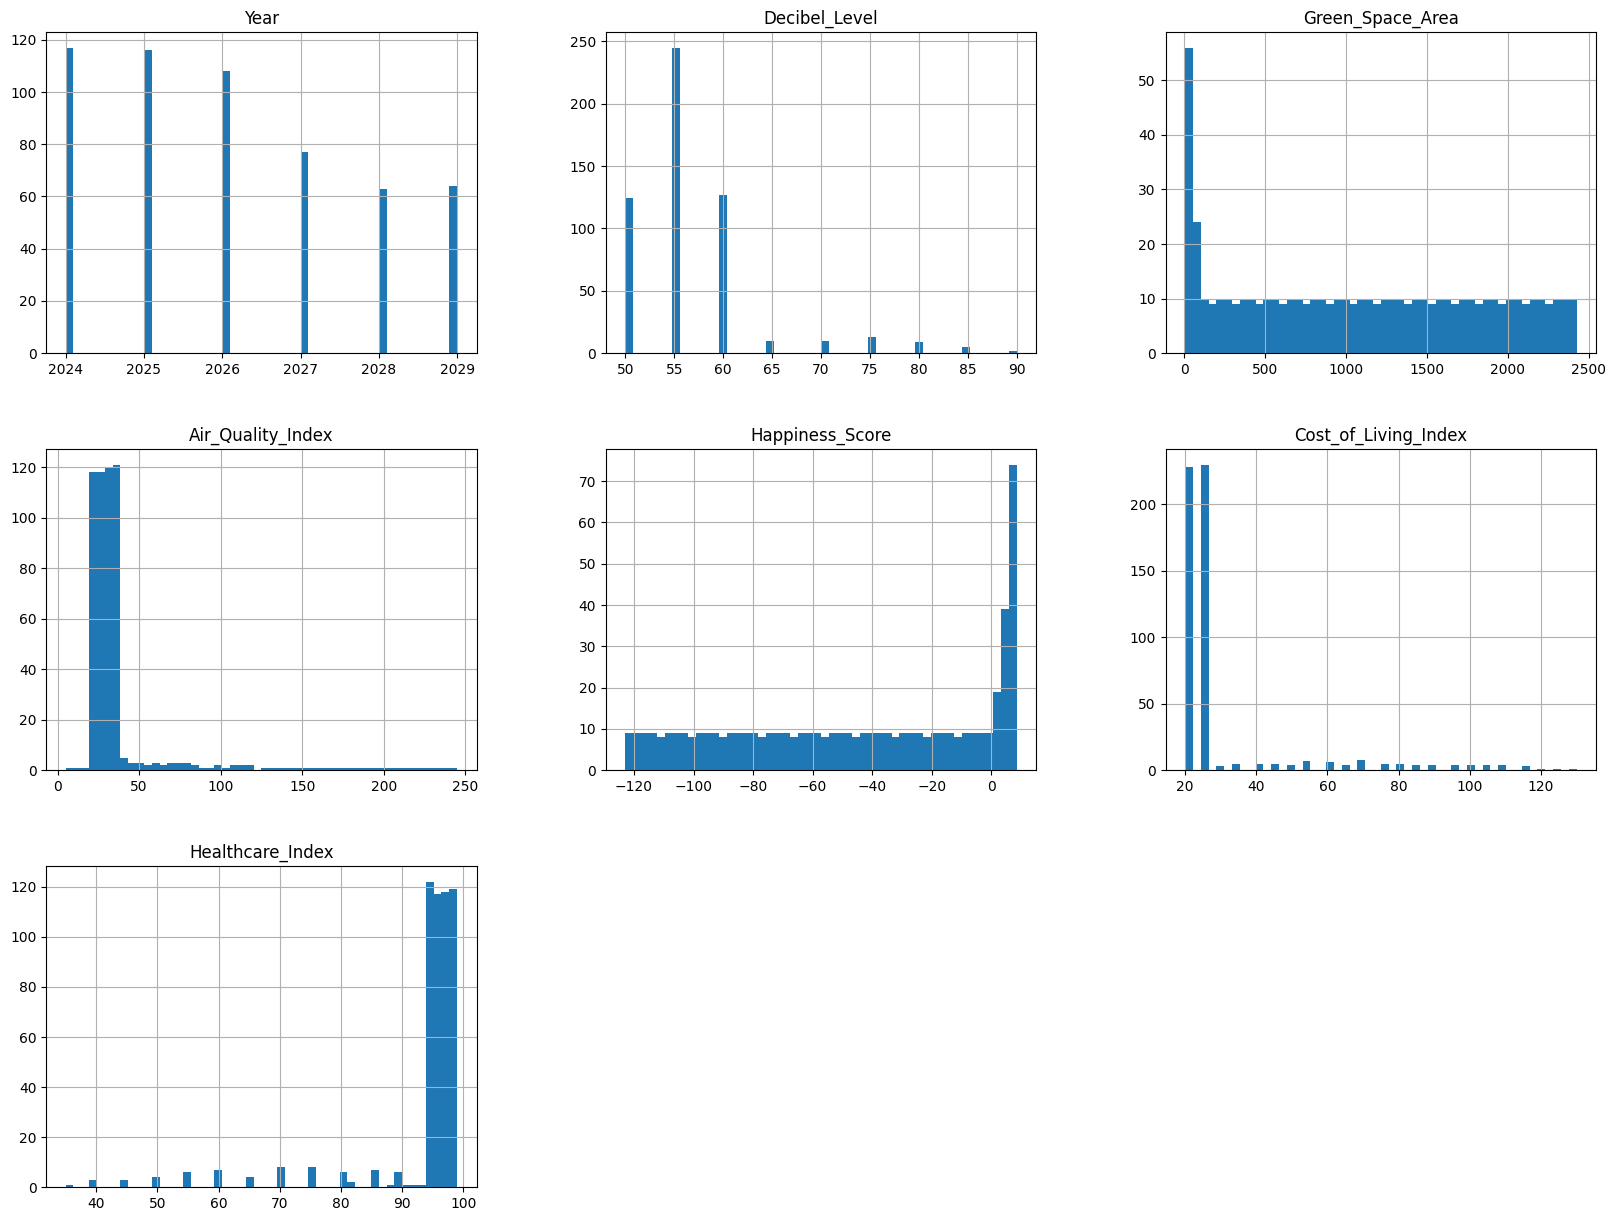

In [ ]:
# hist
df.hist(bins=50, figsize=(20,15))

In [ ]:
# número de valores unicos por columna
for col in df.columns:
  print(col, df[col].nunique())

City 227
Month 12
Year 6
Decibel_Level 9
Traffic_Density 4
Green_Space_Area 485
Air_Quality_Index 49
Happiness_Score 458
Cost_of_Living_Index 23
Healthcare_Index 24


In [ ]:
# label encoder para Month, Traffic_Density y City
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Month_enc'] = le.fit_transform(df['Month'])
df['Traffic_Density_enc'] = le.fit_transform(df['Traffic_Density'])
df['City_enc'] = le.fit_transform(df['City'])

<Axes: >

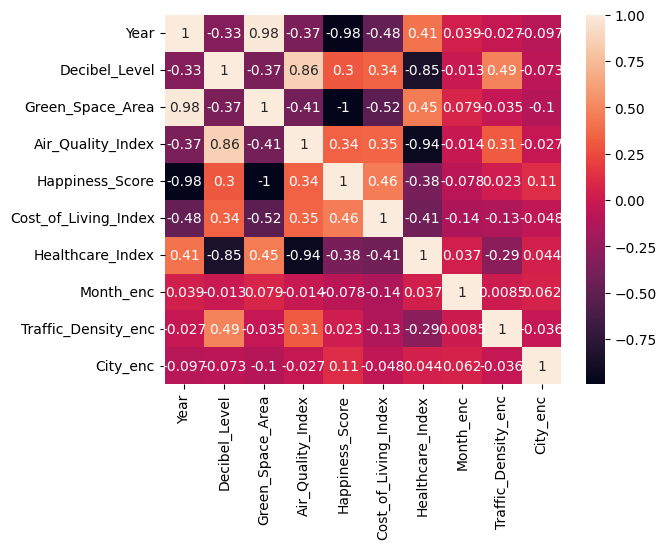

In [ ]:
# gráfica correlación para variables numéricas

#eliminar columnas de tipo object
df_encoded = df.drop(['Month', 'Traffic_Density', 'City'], axis=1)

#matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_encoded.corr()
#plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<ipython-input-79-717afbcad75c>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ts['Date'] = pd.to_datetime(df[['Year', 'Month']].astype(str).agg('-'.join, axis=1))


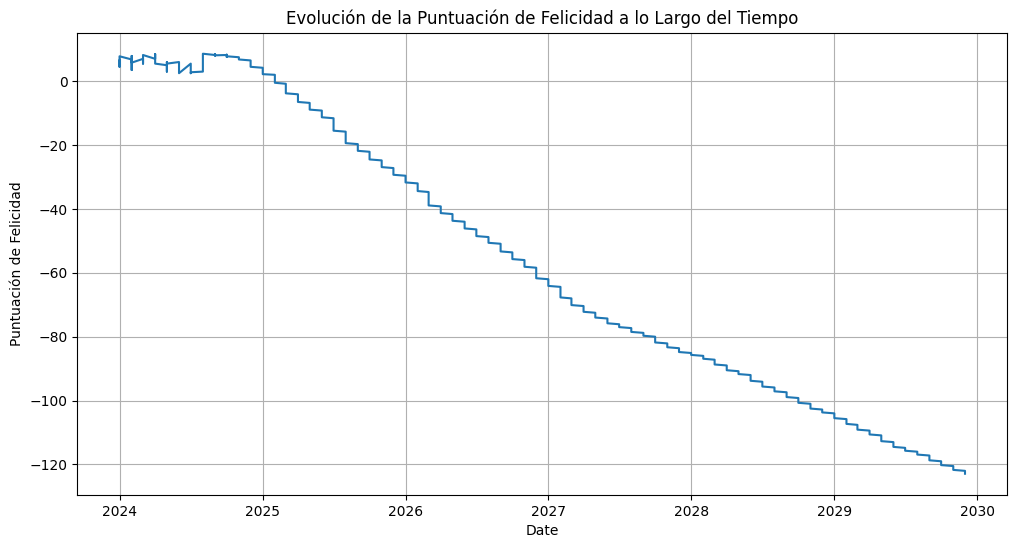

In [ ]:
# time series
import pandas as pd
df_ts = df.copy()
df_ts['Year'] = pd.to_datetime(df_ts['Year'], format='%Y')

df_ts['Date'] = pd.to_datetime(df[['Year', 'Month']].astype(str).agg('-'.join, axis=1))
df_ts.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si lo deseas
plt.plot(df_ts.index, df_ts['Happiness_Score'])
plt.xlabel('Date')
plt.ylabel('Puntuación de Felicidad')
plt.title('Evolución de la Puntuación de Felicidad a lo Largo del Tiempo')
plt.grid(True)
plt.show()


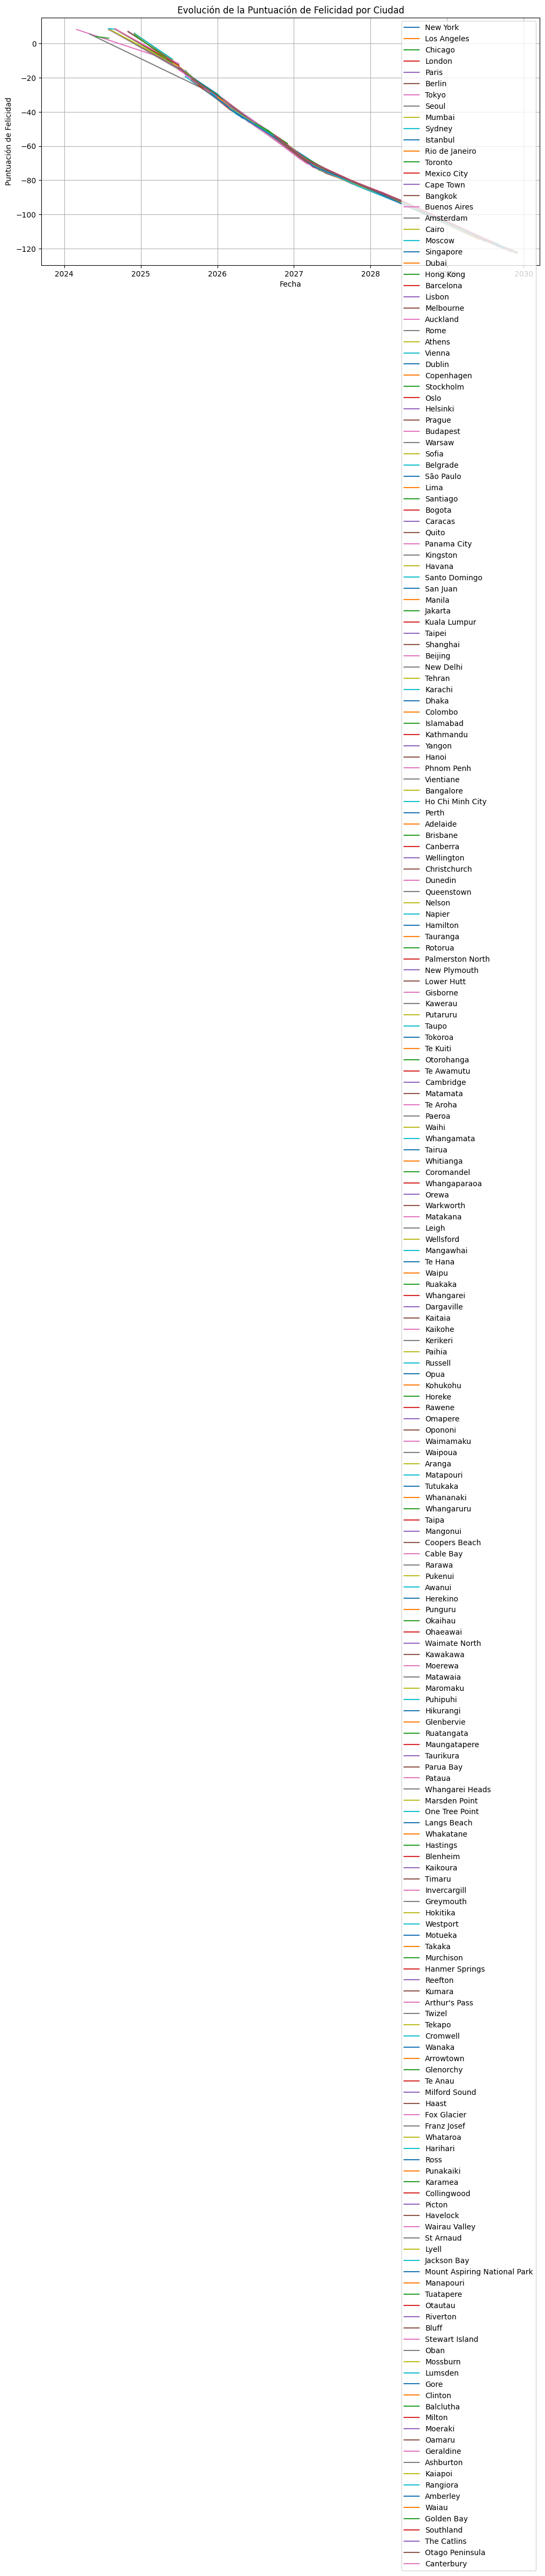

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame 'df' con las columnas 'Fecha', 'Happiness_Score' y 'City'

# Crear el gráfico, agrupando por ciudad
plt.figure(figsize=(12, 6))
for city in df_ts['City'].unique():
    plt.plot(df_ts[df_ts['City'] == city].index, df_ts[df_ts['City'] == city]['Happiness_Score'], label=city)

plt.xlabel('Fecha')
plt.ylabel('Puntuación de Felicidad')
plt.title('Evolución de la Puntuación de Felicidad por Ciudad')
plt.legend()
plt.grid(True)
plt.show()

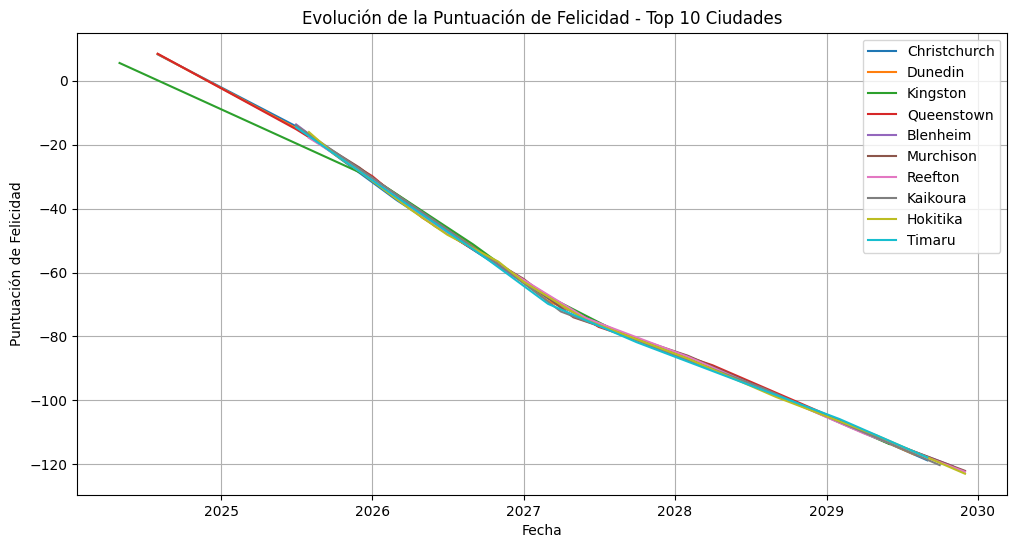

In [ ]:
# Filtrar las 10 ciudades con mayor impacto o relevancia
# Seleccionar las 10 ciudades con más variación en la Puntuación de Felicidad
top_cities = df_ts.groupby('City')['Happiness_Score'].std().nlargest(10).index

plt.figure(figsize=(12, 6))
for city in top_cities:
    city_data = df_ts[df_ts['City'] == city]
    plt.plot(city_data.index, city_data['Happiness_Score'], label=city)

plt.xlabel('Fecha')
plt.ylabel('Puntuación de Felicidad')
plt.title('Evolución de la Puntuación de Felicidad - Top 10 Ciudades')
plt.legend()
plt.grid(True)
plt.show()


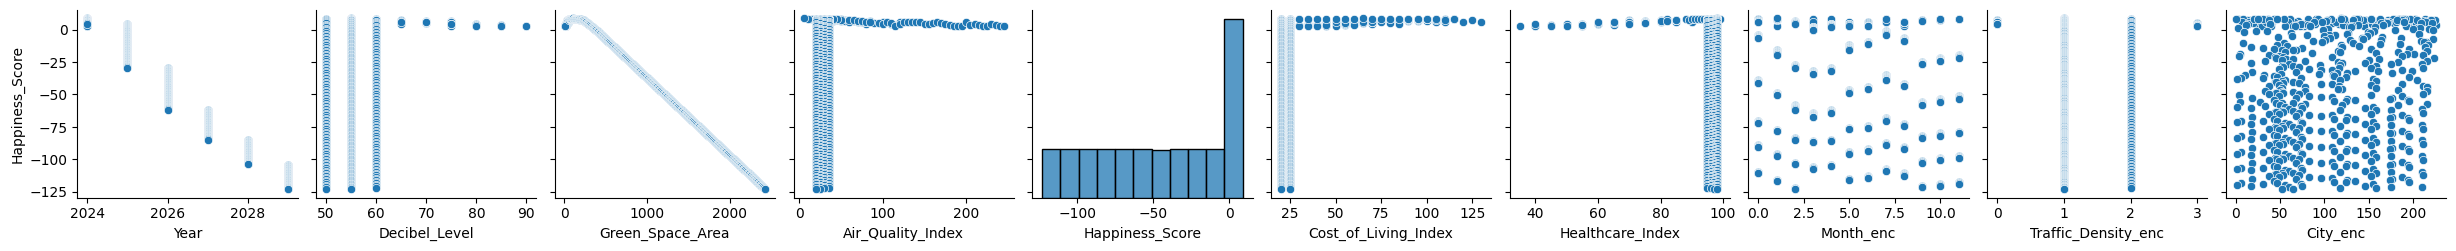

In [ ]:
# scatterplot de happiness_score con todas las variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_encoded, x_vars=df_encoded.columns, y_vars=['Happiness_Score'])




---


* **Eliminamos month, traffic y city, no nos aportan mucha información**



---

Nota: También podríamos evaluar quitar decibel, pero de momento la dejamos



In [ ]:
df = df_encoded.drop(['Month_enc', 'Traffic_Density_enc', 'City_enc'], axis=1)

In [ ]:
df.head()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,2024,70,35,40,6.5,100,80
1,2024,65,40,50,6.8,90,75
2,2024,60,30,55,7.0,85,70
3,2024,55,50,60,7.2,110,85
4,2024,60,45,65,6.9,95,80


In [ ]:
df_test = df_test.drop(['Month', 'Traffic_Density', 'City'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar (excluir 'Year')
cols_to_norm = [col for col in df.columns if col != 'Year']

# Crear un objeto MinMaxScaler y ajustar con el primer DataFrame
scaler = MinMaxScaler()
scaler.fit(df[cols_to_norm])

# Transformar ambos DataFrames
df[cols_to_norm] = scaler.transform(df[cols_to_norm])
df_test[cols_to_norm] = scaler.transform(df_test[cols_to_norm])


In [ ]:
df

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,2024,0.500,0.012397,0.145833,0.984030,0.727273,0.703125
1,2024,0.375,0.014463,0.187500,0.986312,0.636364,0.625000
2,2024,0.250,0.010331,0.208333,0.987833,0.590909,0.546875
3,2024,0.125,0.018595,0.229167,0.989354,0.818182,0.781250
4,2024,0.250,0.016529,0.250000,0.987072,0.681818,0.703125
...,...,...,...,...,...,...,...
540,2029,0.125,0.991736,0.062500,0.009125,0.045455,0.984375
541,2029,0.250,0.993802,0.125000,0.006844,0.000000,0.937500
542,2029,0.125,0.995868,0.104167,0.004563,0.045455,0.953125
543,2029,0.000,0.997934,0.083333,0.002281,0.000000,0.968750


In [ ]:
df_preprocesado = df
df_preprocesado.to_csv('/content/drive/MyDrive/happiness/df_preprocesado.csv', index=False)

## Enfoque con aprendizaje por refuerzo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal
import pandas as pd

# Entorno
class HappinessEnv(gym.Env):
    def __init__(self, data, max_steps=10):
        super(HappinessEnv, self).__init__()
        self.data = data
        self.state = None
        self.current_index = 0
        self.steps = 0
        self.max_steps = max_steps

        # Espacio de estado (excluye 'Year' y 'Happiness_Score')
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(len(data.columns) - 2,), dtype=np.float32)
        # Espacio de acción
        self.action_space = gym.spaces.Box(low=-0.05, high=0.05, shape=(len(data.columns) - 2,), dtype=np.float32)

    def reset(self):
        self.current_index = np.random.randint(0, len(self.data))
        self.state = self.data.iloc[self.current_index, 1:-1].values.astype(np.float32)
        self.steps = 0
        return self.state

    def step(self, action):
        self.steps += 1
        # Aplicar cambios al estado
        self.state = np.clip(self.state + action, 0, 1)

        # Nueva recompensa calculada (simulación)
        happiness_base = self.data.iloc[self.current_index, -1]
        happiness_change = np.sum(action)  # Suma de impactos de las acciones
        reward = happiness_base + happiness_change

        done = self.steps >= self.max_steps
        return self.state, reward, done, {}

# Modelo Actor-Crítico
class ActorCritic(nn.Module):
    def __init__(self, input_dim, action_dim):
        super(ActorCritic, self).__init__()
        self.shared = nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU())
        self.actor = nn.Sequential(nn.Linear(128, action_dim), nn.Tanh())
        self.critic = nn.Linear(128, 1)

    def forward(self, state):
        shared = self.shared(state)
        return self.actor(shared), self.critic(shared)

# Entrenamiento del agente
def train(env, model, optimizer, episodes=1000, gamma=0.99):
    reward_history = []  # Registro de recompensas por episodio

    for episode in range(episodes):
        state = env.reset()
        log_probs, values, rewards = [], [], []
        done = False

        while not done:
            state = torch.FloatTensor(state).unsqueeze(0)
            action_mean, value = model(state)
            dist = Normal(action_mean, 0.1)
            action = dist.sample()
            log_prob = dist.log_prob(action).sum()

            next_state, reward, done, _ = env.step(action.detach().numpy().squeeze())
            log_probs.append(log_prob)
            values.append(value)
            rewards.append(reward)
            state = next_state

        # Calcular recompensas descontadas
        returns, R = [], 0
        for r in reversed(rewards):
            R = r + gamma * R
            returns.insert(0, R)
        returns = torch.FloatTensor(returns)

        log_probs = torch.stack(log_probs)
        values = torch.cat(values).squeeze()
        advantage = returns - values

        actor_loss = -(log_probs * advantage.detach()).mean()
        critic_loss = advantage.pow(2).mean()

        optimizer.zero_grad()
        (actor_loss + critic_loss).backward()
        optimizer.step()

        total_reward = sum(rewards)
        reward_history.append(total_reward)  # Guardar recompensa total del episodio

        if (episode + 1) % 1000 == 0:
            print(f"Episode {episode+1}, Total Reward: {total_reward:.2f}")

    # Graficar recompensas después de entrenar
    plot_rewards(reward_history)


# Función para graficar recompensas
def plot_rewards(reward_history):
    plt.figure(figsize=(10, 6))
    plt.plot(reward_history, label="Total Reward per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Agent Learning Progress")
    plt.legend()
    plt.grid()
    plt.show()


#### Dataset original

Episode 1000, Total Reward: 39.33
Episode 2000, Total Reward: 52.77
Episode 3000, Total Reward: 49.46
Episode 4000, Total Reward: 59.24
Episode 5000, Total Reward: 58.71


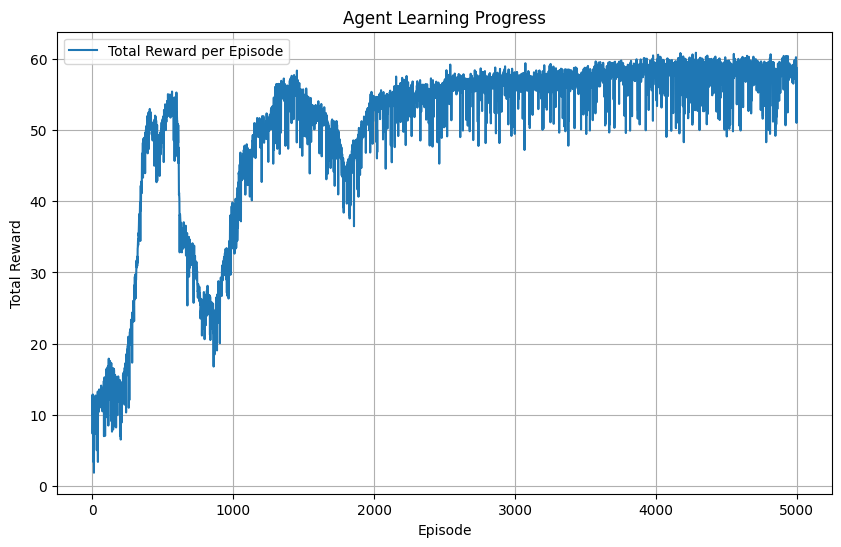

In [ ]:
# Cargar dataset y entrenar
if __name__ == "__main__":

    env = HappinessEnv(df)
    input_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    model = ActorCritic(input_dim, action_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    train(env, model, optimizer, episodes=5000)

#### Dataset recortado

In [ ]:

df_recortado = pd.read_csv('/content/drive/MyDrive/happiness/train.csv')
df_recortado = df_recortado.drop(['Month', 'Traffic_Density', 'City'], axis=1)

#eliminar valores de happiness negativos
df_recortado = df_recortado[df_recortado['Happiness_Score'] >= 1]


Episode 1000, Total Reward: 885.42
Episode 2000, Total Reward: 788.28
Episode 3000, Total Reward: 790.34
Episode 4000, Total Reward: 540.50
Episode 5000, Total Reward: 590.72


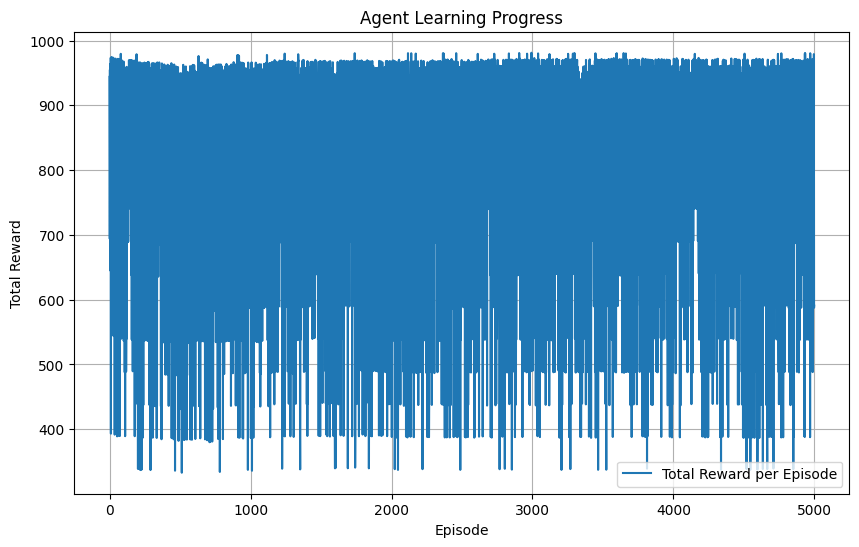

In [ ]:
# Cargar dataset y entrenar
if __name__ == "__main__":

    env = HappinessEnv(df_recortado)
    input_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    model = ActorCritic(input_dim, action_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    train(env, model, optimizer, episodes=5000)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#normalizar variables en escala de 0 a 1
cols_to_norm = [col for col in df_recortado.columns if col != 'Year']
scaler = MinMaxScaler()
df_recortado[cols_to_norm] = scaler.fit_transform(df_recortado[cols_to_norm])


Episode 1000, Total Reward: 59.24
Episode 2000, Total Reward: 53.72
Episode 3000, Total Reward: 59.57
Episode 4000, Total Reward: 58.86
Episode 5000, Total Reward: 57.18


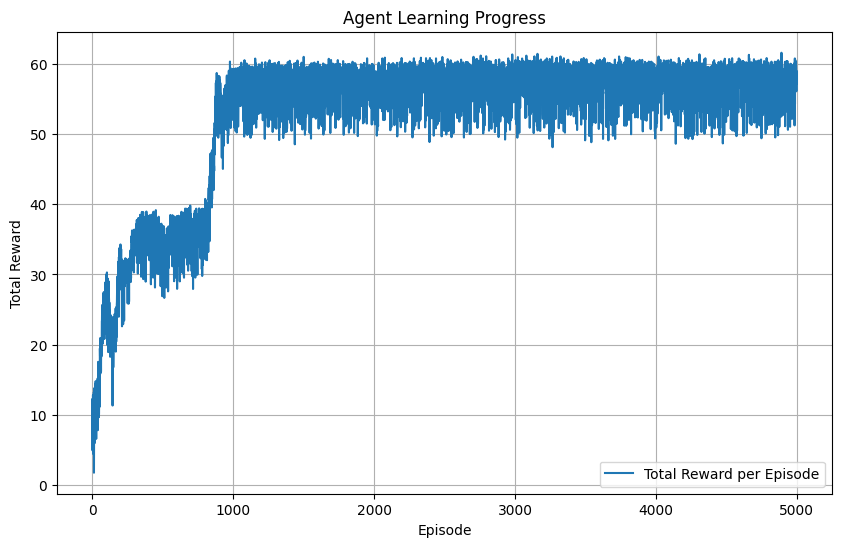

In [ ]:
# Cargar dataset y entrenar
if __name__ == "__main__":

    env = HappinessEnv(df_recortado)
    input_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    model = ActorCritic(input_dim, action_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train(env, model, optimizer, episodes=5000)

## Enfoque con sistemas neurodifusos

#### lib

In [ ]:
!pip install -U scikit-fuzzy

##### ANFIS

In [ ]:
import itertools
import numpy as np
import copy
import matplotlib.pyplot as plt
from skfuzzy import gaussmf, gbellmf, sigmf

class ANFIS:
    """Class to implement an Adaptive Network Fuzzy Inference System: ANFIS"""

    def __init__(self, X, Y, memFunction):
        self.X = np.array(copy.deepcopy(X))
        self.Y = np.array(copy.deepcopy(Y))
        self.XLen = len(self.X)
        self.memClass = copy.deepcopy(memFunction)
        self.memFuncs = self.memClass.MFList
        self.memFuncsByVariable = [[x for x in range(len(self.memFuncs[z]))] for z in range(len(self.memFuncs))]
        self.rules = np.array(list(itertools.product(*self.memFuncsByVariable)))
        self.consequents = np.empty(self.Y.ndim * len(self.rules) * (self.X.shape[1] + 1))
        self.consequents.fill(0)
        self.errors = np.empty(0)
        self.memFuncsHomo = all(len(i) == len(self.memFuncsByVariable[0]) for i in self.memFuncsByVariable)
        self.trainingType = 'Not trained yet'

    def LSE(self, A, B, initialGamma=1000.):
        coeffMat = A
        rhsMat = B
        S = np.eye(coeffMat.shape[1]) * initialGamma
        x = np.zeros((coeffMat.shape[1], 1))  # need to correct for multi-dim B
        for i in range(len(coeffMat[:, 0])):
            a = coeffMat[i, :]
            b = np.array(rhsMat[i])
            S = S - (np.array(np.dot(np.dot(np.dot(S, np.matrix(a).transpose()), np.matrix(a)), S))) / (1 + (np.dot(np.dot(S, a), a)))
            x = x + (np.dot(S, np.dot(np.matrix(a).transpose(), (np.matrix(b) - np.dot(np.matrix(a), x)))))
        return x

    def trainHybridJangOffLine(self, epochs=5, tolerance=1e-5, initialGamma=1000, k=0.01):
        self.trainingType = 'trainHybridJangOffLine'
        convergence = False
        epoch = 1

        while (epoch < epochs) and (not convergence):

            # layer four: forward pass
            layerFour, wSum, w = forwardHalfPass(self, self.X)

            # layer five: least squares estimate
            layerFive = np.array(self.LSE(layerFour, self.Y, initialGamma))
            self.consequents = layerFive
            layerFive = np.dot(layerFour, layerFive)

            # error
            error = np.sum((self.Y - layerFive.T) ** 2)
            print('current error: ', error)
            average_error = np.average(np.absolute(self.Y - layerFive.T))
            self.errors = np.append(self.errors, error)

            if len(self.errors) != 0:
                if self.errors[len(self.errors) - 1] < tolerance:
                    convergence = True

            # back propagation
            if not convergence:
                cols = list(range(len(self.X[0, :])))
                dE_dAlpha = [backprop(self, colX, cols, wSum, w, layerFive) for colX in range(self.X.shape[1])]

            if len(self.errors) >= 4:
                if self.errors[-4] > self.errors[-3] > self.errors[-2] > self.errors[-1]:
                    k = k * 1.1

            if len(self.errors) >= 5:
                if (self.errors[-1] < self.errors[-2]) and (self.errors[-3] < self.errors[-2]) and (self.errors[-3] < self.errors[-4]) and (self.errors[-5] > self.errors[-4]):
                    k = k * 0.9

            # handling of variables with a different number of MFs
            t = []
            for x in range(len(dE_dAlpha)):
                for y in range(len(dE_dAlpha[x])):
                    for z in range(len(dE_dAlpha[x][y])):
                        t.append(dE_dAlpha[x][y][z])

            eta = k / np.abs(np.sum(t))

            if np.isinf(eta):
                eta = k

            # handling of variables with a different number of MFs
            dAlpha = copy.deepcopy(dE_dAlpha)
            if not self.memFuncsHomo:
                for x in range(len(dE_dAlpha)):
                    for y in range(len(dE_dAlpha[x])):
                        for z in range(len(dE_dAlpha[x][y])):
                            dAlpha[x][y][z] = -eta * dE_dAlpha[x][y][z]
            else:
                # Asegurarse de que dE_dAlpha tenga una estructura homogénea
                #dE_dAlpha_flat = np.concatenate([np.array(sublist) for sublist in dE_dAlpha], axis=0)

                # Luego, aplica la operación
                #dAlpha = -eta * dE_dAlpha_flat
                dAlpha = [[-eta * np.array(sublist) for sublist in variable] for variable in dE_dAlpha]
                #dAlpha = -eta * np.array(dE_dAlpha)

            for varsWithMemFuncs in range(len(self.memFuncs)):
              for MFs in range(len(self.memFuncsByVariable[varsWithMemFuncs])):
                  paramList = sorted(self.memFuncs[varsWithMemFuncs][MFs]['params'])
                  for param in range(len(paramList)):
                      self.memFuncs[varsWithMemFuncs][MFs]['params'][paramList[param]] += dAlpha[varsWithMemFuncs][MFs][param]

            epoch += 1

        self.fittedValues = predict(self, self.X)
        self.residuals = self.Y - self.fittedValues[:, 0]

        return self.fittedValues

    def plotErrors(self):
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            plt.plot(range(len(self.errors)), self.errors, 'ro', label='errors')
            plt.ylabel('error')
            plt.xlabel('epoch')
            plt.show()

    def plotMF(self, x, inputVar):
        for mf in range(len(self.memFuncs[inputVar])):
            if self.memFuncs[inputVar][mf][0] == 'gaussmf':
                y = gaussmf(x, **self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'gbellmf':
                y = gbellmf(x, **self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'sigmf':
                y = sigmf(x, **self.memClass.MFList[inputVar][mf][1])

            plt.plot(x, y, 'r')

        plt.show()

    def plotResults(self):
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            plt.plot(range(len(self.fittedValues)), self.fittedValues, 'r', label='trained')
            plt.plot(range(len(self.Y)), self.Y, 'b', label='original')
            plt.legend(loc='upper left')
            plt.show()

    def extract_rules_with_outputs(self, variable_names, output_name):
      """
      Extrae e imprime las reglas inferidas por ANFIS, incluyendo el consecuente ajustado etiquetado.

      Parámetros:
          variable_names: lista con los nombres de las variables de entrada.
          output_name: nombre de la variable de salida.
      """
      rules = self.rules  # Matriz de reglas
      mem_funcs = self.memFuncs  # Funciones de membresía de entrada
      consequents = self.consequents.reshape(len(rules), -1)  # Parámetros del consecuente

      # Etiquetas para las MFs de entrada
      #mf_labels = [[mf[0] for mf in var_mfs] for var_mfs in mem_funcs]  # Nombres de las MF
      # Etiquetas para las MFs de entrada
      #mf_labels = [[mf.get('label', f"mf_{idx}") for idx, mf in enumerate(var_mfs)] for var_mfs in mem_funcs]
      # Extraer etiquetas de las funciones de membresía
      mf_labels = [[mf['label'] for mf in var_mfs] for var_mfs in mem_funcs]



      # Rango de valores para clasificar las salidas como Bajo, Medio o Alto
      output_values = []  # Guardar los valores ajustados de cada regla
      for i, consequent in enumerate(consequents):
          # Consecuente lineal ajustado (ignoramos términos individuales)
          output_values.append(np.mean(consequent))  # Tomamos el promedio de parámetros del consecuente

      # Asignamos etiquetas a los valores ajustados
      min_output, max_output = min(output_values), max(output_values)
      thresholds = {
          "Bajo": min_output + (max_output - min_output) * 0.33,
          "Medio": min_output + (max_output - min_output) * 0.66,
      }

      def classify_output(value):
          if value <= thresholds["Bajo"]:
              return "Bajo"
          elif value <= thresholds["Medio"]:
              return "Medio"
          else:
              return "Alto"

      # Generamos las reglas interpretables
      print("Reglas inferidas por ANFIS:")
      for i, rule in enumerate(rules):
          antecedents = []
          for j, mf_idx in enumerate(rule):
              label = mf_labels[j][mf_idx]
              antecedents.append(f"{variable_names[j]} ES {label}")
          output_label = classify_output(output_values[i])
          rule_str = " Y ".join(antecedents)
          print(f"Regla {i+1}: SI {rule_str} => {output_name} ES {output_label}")




def forwardHalfPass(ANFISObj, Xs):
    layerFour = np.empty(0,)
    wSum = []

    for pattern in range(len(Xs[:, 0])):
        # layer one
        layerOne = ANFISObj.memClass.evaluateMF(Xs[pattern, :])

        # layer two
        miAlloc = [[layerOne[x][ANFISObj.rules[row][x]] for x in range(len(ANFISObj.rules[0]))] for row in range(len(ANFISObj.rules))]
        layerTwo = np.array([np.prod(x) for x in miAlloc]).T
        if pattern == 0:
            w = layerTwo
        else:
            w = np.vstack((w, layerTwo))

        # layer three
        wSum.append(np.sum(layerTwo))
        if pattern == 0:
            wNormalized = layerTwo / wSum[pattern]
        else:
            wNormalized = np.vstack((wNormalized, layerTwo / wSum[pattern]))

        # prep for layer four (bit of a hack)
        layerThree = layerTwo / wSum[pattern]
        rowHolder = np.concatenate([x * np.append(Xs[pattern, :], 1) for x in layerThree])
        layerFour = np.append(layerFour, rowHolder)

    w = w.T
    wNormalized = wNormalized.T
    layerFour = np.array(np.array_split(layerFour, pattern + 1))

    return layerFour, wSum, w


def backprop(ANFISObj, columnX, columns, theWSum, theW, theLayerFive):
    paramGrp = [0] * len(ANFISObj.memFuncs[columnX])
    for MF in range(len(ANFISObj.memFuncs[columnX])):
      param_dict = ANFISObj.memFuncs[columnX][MF]['params']  # Accede al diccionario 'params'
      parameters = np.empty(len(param_dict))  # Crea un array para los parámetros
      timesThru = 0

      for alpha in sorted(param_dict.keys()):  # Itera sobre las claves 'mean', 'sigma', etc.
          bucket3 = np.empty(len(ANFISObj.X))

          for rowX in range(len(ANFISObj.X)):
              varToTest = ANFISObj.X[rowX, columnX]
              tmpRow = np.empty(len(ANFISObj.memFuncs))
              tmpRow.fill(varToTest)

              bucket2 = np.empty(ANFISObj.Y.ndim)
              for colY in range(ANFISObj.Y.ndim):

                  rulesWithAlpha = np.array(np.where(ANFISObj.rules[:, columnX] == MF))[0]
                  adjCols = np.delete(columns, columnX)

                  # Derivada parcial usando la clave actual 'alpha'
                  senSit = partial_dMF(varToTest, ANFISObj.memFuncs[columnX][MF], alpha)
                  dW_dAplha = senSit * np.array([
                      np.prod([
                          ANFISObj.memClass.evaluateMF(tmpRow)[c][ANFISObj.rules[r][c]]
                          for c in adjCols
                      ])
                      for r in rulesWithAlpha
                  ])

                  bucket1 = np.empty(len(ANFISObj.rules[:, 0]))
                  for consequent in range(len(ANFISObj.rules[:, 0])):
                      fConsequent = np.dot(
                          np.append(ANFISObj.X[rowX, :], 1.),
                          ANFISObj.consequents[
                              ((ANFISObj.X.shape[1] + 1) * consequent):
                              (((ANFISObj.X.shape[1] + 1) * consequent) + (ANFISObj.X.shape[1] + 1)),
                              colY
                          ]
                      )
                      acum = 0
                      if consequent in rulesWithAlpha:
                          acum = dW_dAplha[np.where(rulesWithAlpha == consequent)] * theWSum[rowX]

                      acum -= theW[consequent, rowX] * np.sum(dW_dAplha)
                      acum /= theWSum[rowX] ** 2
                      bucket1[consequent] = (fConsequent * acum).item()

                  sum1 = np.sum(bucket1)
                  if ANFISObj.Y.ndim == 1:
                      bucket2[colY] = sum1 * (ANFISObj.Y[rowX] - theLayerFive[rowX, colY]) * (-2)
                  else:
                      bucket2[colY] = sum1 * (ANFISObj.Y[rowX, colY] - theLayerFive[rowX, colY]) * (-2)

              sum2 = np.sum(bucket2)
              bucket3[rowX] = sum2

          sum3 = np.sum(bucket3)
          parameters[timesThru] = sum3
          timesThru += 1

      paramGrp[MF] = parameters


    return paramGrp


def predict(ANFISObj, varsToTest):
    layerFour, wSum, w = forwardHalfPass(ANFISObj, varsToTest)

    # layer five
    layerFive = np.dot(layerFour, ANFISObj.consequents)

    return layerFive


if __name__ == "__main__":
    print("I am main!")


I am main!


##### MemFuncs

In [ ]:
from skfuzzy import gaussmf, gbellmf, sigmf

class MemFuncs:
    'Common base class for all employees'
    funcDict = {'gaussmf': gaussmf, 'gbellmf': gbellmf, 'sigmf': sigmf}

    def __init__(self, MFList):
        self.MFList = MFList

    def evaluateMF(self, rowInput):
        if len(rowInput) != len(self.MFList):
            print("Number of variables does not match number of rule sets")

        #return [[self.funcDict[self.MFList[i][k][0]](rowInput[i], **self.MFList[i][k][1])
         #        for k in range(len(self.MFList[i]))]
                #for i in range(len(rowInput))]
          # Modificar la línea que llama a las funciones de membresía
        return [[self.funcDict[self.MFList[i][k]['function']](rowInput[i], **self.MFList[i][k]['params'])
                for k in range(len(self.MFList[i]))]
                for i in range(len(rowInput))]



In [ ]:
def partial_dMF(x, mf_definition, partial_parameter):
    """Calculates the partial derivative of a membership function at a point x.

    Parameters
    ----------
    x : float
        The point at which the partial derivative is calculated.
    mf_definition : dict
        The membership function definition, where 'function' is the function name and 'params' is a dictionary of parameters.
    partial_parameter : str
        The parameter for which the partial derivative is calculated ('sigma', 'mean', 'a', 'b', or 'c').

    Returns
    -------
    result : float
        The calculated partial derivative.
    """
    mf_name = mf_definition['function']  # Accede a la clave 'function'

    # Accede a los parámetros usando la clave 'params'
    params = mf_definition['params']

    if mf_name == 'gaussmf':
        sigma = params['sigma']
        mean = params['mean']

        if partial_parameter == 'sigma':
            result = (2. / sigma**3) * np.exp(-(((x - mean)**2) / (sigma)**2)) * (x - mean)**2
        elif partial_parameter == 'mean':
            result = (2. / sigma**2) * np.exp(-(((x - mean)**2) / (sigma)**2)) * (x - mean)
        else:
            raise ValueError(f"Invalid partial parameter for {mf_name}: {partial_parameter}")

    elif mf_name == 'gbellmf':
        a = params['a']
        b = params['b']
        c = params['c']

        if partial_parameter == 'a':
            result = (2. * b * np.power((c - x), 2) * np.power(np.absolute((c - x) / a), ((2 * b) - 2))) / \
                     (np.power(a, 3) * np.power((np.power(np.absolute((c - x) / a), (2 * b)) + 1), 2))
        elif partial_parameter == 'b':
            result = -1 * (2 * np.power(np.absolute((c - x) / a), (2 * b)) * np.log(np.absolute((c - x) / a))) / \
                     (np.power((np.power(np.absolute((c - x) / a), (2 * b)) + 1), 2))
        elif partial_parameter == 'c':
            result = (2. * b * (c - x) * np.power(np.absolute((c - x) / a), ((2 * b) - 2))) / \
                     (np.power(a, 2) * np.power((np.power(np.absolute((c - x) / a), (2 * b)) + 1), 2))
        else:
            raise ValueError(f"Invalid partial parameter for {mf_name}: {partial_parameter}")

    elif mf_name == 'sigmf':
        b = params['b']
        c = params['c']

        if partial_parameter == 'b':
            result = -1 * (c * np.exp(c * (b + x))) / \
                     np.power((np.exp(b * c) + np.exp(c * x)), 2)
        elif partial_parameter == 'c':
            result = ((x - b) * np.exp(c * (x - b))) / \
                     np.power((np.exp(c * (x - b))) + 1, 2)
        else:
            raise ValueError(f"Invalid partial parameter for {mf_name}: {partial_parameter}")
    else:
        raise ValueError(f"Unsupported membership function: {mf_name}")

    return result


###Funciones de membresía

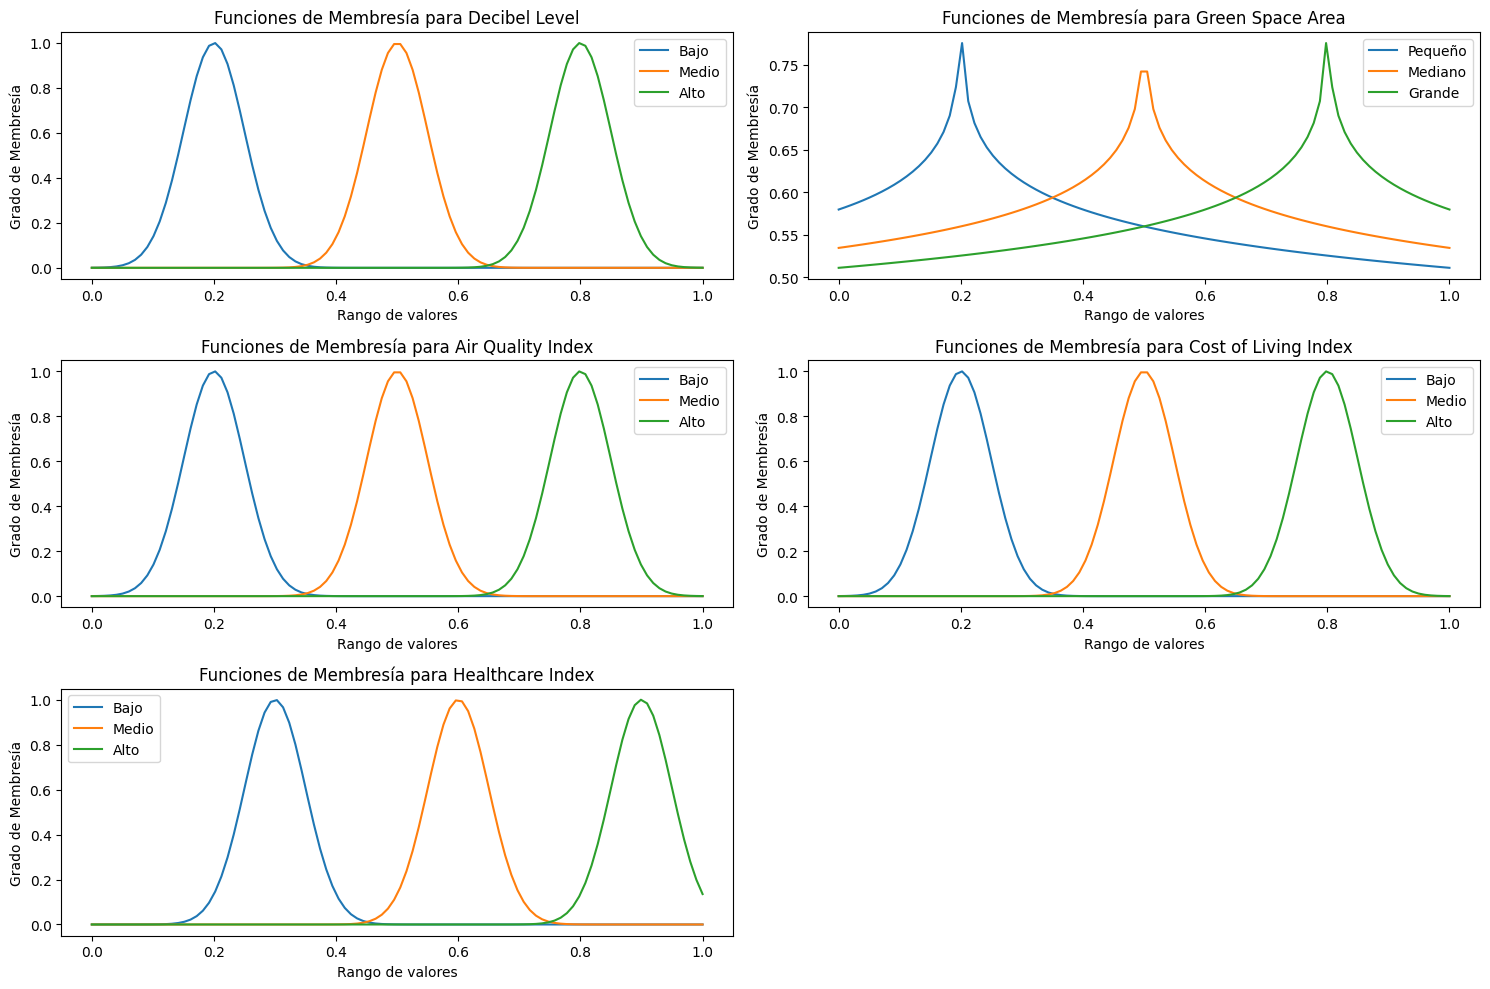

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# Variables: Decibel_Level, Green_Space_Area, Air_Quality_Index,  Cost_of_Living_Index, Healthcare_Index

mf = [
    [  # Decibel Level
        {'function': 'gaussmf', 'params': {'mean': 0.2, 'sigma': 0.05}, 'label': 'Bajo'},
        {'function': 'gaussmf', 'params': {'mean': 0.5, 'sigma': 0.05}, 'label': 'Medio'},
        {'function': 'gaussmf', 'params': {'mean': 0.8, 'sigma': 0.05}, 'label': 'Alto'}
    ],
    [  # Green Space Area
        {'function': 'gbellmf', 'params': {'a': 1, 'b': 0.1, 'c': 0.2}, 'label': 'Pequeño'},
        {'function': 'gbellmf', 'params': {'a': 1, 'b': 0.1, 'c': 0.5}, 'label': 'Mediano'},
        {'function': 'gbellmf', 'params': {'a': 1, 'b': 0.1, 'c': 0.8}, 'label': 'Grande'}
    ],
    [  # Air Quality Index
        {'function':'gaussmf', 'params':{'mean': 0.2, 'sigma': 0.05}, 'label': 'Bajo'},
        {'function':'gaussmf', 'params':{'mean': 0.5, 'sigma': 0.05}, 'label': 'Medio'},
        {'function':'gaussmf', 'params':{'mean': 0.8, 'sigma': 0.05}, 'label': 'Alto'}
    ],
    [  # Cost of Living Index
        {'function':'gaussmf', 'params':{'mean': 0.2, 'sigma': 0.05}, 'label': 'Bajo'},
        {'function':'gaussmf','params': {'mean': 0.5, 'sigma': 0.05}, 'label': 'Medio'},
        {'function':'gaussmf', 'params':{'mean': 0.8, 'sigma': 0.05}, 'label': 'Alto'}
    ],
    [  # Healthcare Index
        {'function':'gaussmf', 'params':{'mean': 0.3, 'sigma': 0.05}, 'label': 'Bajo'},
        {'function':'gaussmf', 'params':{'mean': 0.6, 'sigma': 0.05}, 'label': 'Medio'},
        {'function':'gaussmf', 'params':{'mean': 0.9, 'sigma': 0.05}, 'label': 'Alto'}
    ]
]



# Función auxiliar para evaluar y graficar las funciones de membresía
def plot_membership_functions(mf, variable_names, x_range):
    """
    Grafica funciones de membresía para múltiples variables.

    Parameters:
    - mf: Lista de funciones de membresía por variable.
    - variable_names: Nombres de las variables.
    - x_range: Rango de valores de entrada.
    """
    num_variables = len(mf)  # Número de variables
    plt.figure(figsize=(15, 10))  # Tamaño general del gráfico

    # Iterar sobre cada variable y sus funciones de membresía
    for i, (var_mfs, var_name) in enumerate(zip(mf, variable_names)):
        plt.subplot(3, 2, i+1)  # Configuración de subgráficos (hasta 6 gráficos)
        for mf_def in var_mfs:
            # Extraer parámetros
            func = mf_def['function']
            params = mf_def['params']
            label = mf_def.get('label', 'MF')  # Etiqueta opcional

            # Evaluar funciones de membresía
            if func == 'gaussmf':
                y = fuzz.gaussmf(x_range, params['mean'], params['sigma'])
            elif func == 'gbellmf':
                y = fuzz.gbellmf(x_range, params['a'], params['b'], params['c'])
            else:
                raise ValueError(f"Función de membresía desconocida: {func}")

            # Graficar
            plt.plot(x_range, y, label=label)

        plt.title(f'Funciones de Membresía para {var_name}')
        plt.xlabel('Rango de valores')
        plt.ylabel('Grado de Membresía')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Datos de entrada
x = np.linspace(0, 1, 100)  # Rango de valores de entrada
variable_names = [
    "Decibel Level",
    "Green Space Area",
    "Air Quality Index",
    "Cost of Living Index",
    "Healthcare Index"
]

# Llamar a la función para graficar
plot_membership_functions(mf, variable_names, x)


### Dataset original

#### Ajuste iterativo de las reglas

In [ ]:
# Variables de entrada y salida
inputs = ['Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index',
          'Cost_of_Living_Index', 'Healthcare_Index']
output = 'Happiness_Score'

X = df[inputs].values
Y = df[output].values


# Dividir en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Crear las funciones de membresía
mfc = MemFuncs(mf)

# Inicializar el modelo ANFIS
anfis_model = ANFIS(X_train, Y_train.flatten(), mfc)

# Entrenar el modelo (método híbrido)

anfis_model.trainHybridJangOffLine(epochs=3)



current error:  0.013281778852460948
current error:  0.013250758213748897


array([[0.30018573],
       [0.59269566],
       [0.0955387 ],
       [0.76413423],
       [0.62829736],
       [0.95308547],
       [0.15507094],
       [0.10722697],
       [0.95335541],
       [0.73709682],
       [0.26060876],
       [0.14013861],
       [0.96697845],
       [0.93646653],
       [0.98360213],
       [0.52820419],
       [0.84520758],
       [0.71958804],
       [0.96848549],
       [0.57766037],
       [0.54602879],
       [0.08979081],
       [0.84962829],
       [0.6303702 ],
       [0.47305335],
       [0.49551157],
       [0.9631381 ],
       [0.98812752],
       [0.71440684],
       [0.22923462],
       [0.42768084],
       [0.19009359],
       [0.04187991],
       [0.54414433],
       [0.56373922],
       [0.15906914],
       [0.78651762],
       [0.38204433],
       [0.02431248],
       [0.98594135],
       [0.51032809],
       [0.9795893 ],
       [0.99746583],
       [0.96320002],
       [0.50249501],
       [0.22236043],
       [0.61447711],
       [0.374

#### Reglas inferidas

In [ ]:

# Extraer e imprimir las reglas
anfis_model.extract_rules_with_outputs(inputs, output)


Reglas inferidas por ANFIS:
Regla 1: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Bajo Y Healthcare_Index ES Bajo => Happiness_Score ES Bajo
Regla 2: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Bajo Y Healthcare_Index ES Medio => Happiness_Score ES Bajo
Regla 3: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Bajo Y Healthcare_Index ES Alto => Happiness_Score ES Bajo
Regla 4: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Medio Y Healthcare_Index ES Bajo => Happiness_Score ES Bajo
Regla 5: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Medio Y Healthcare_Index ES Medio => Happiness_Score ES Medio
Regla 6: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Inde

#### Evaluar

RMSE en los datos de prueba: 0.010099004017841915


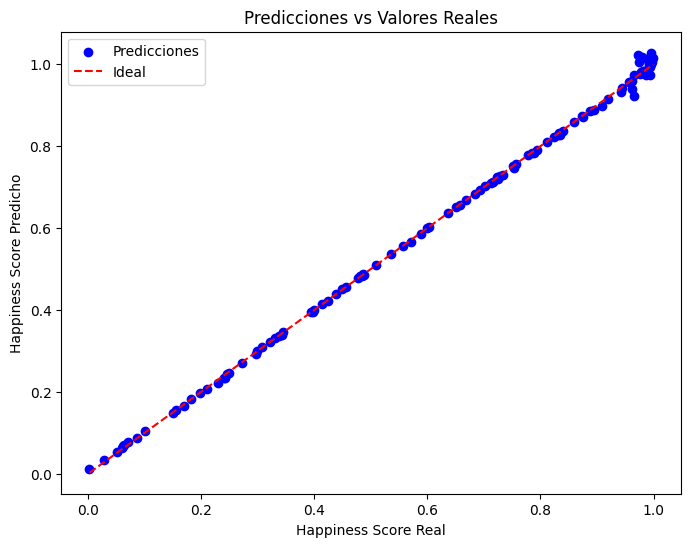

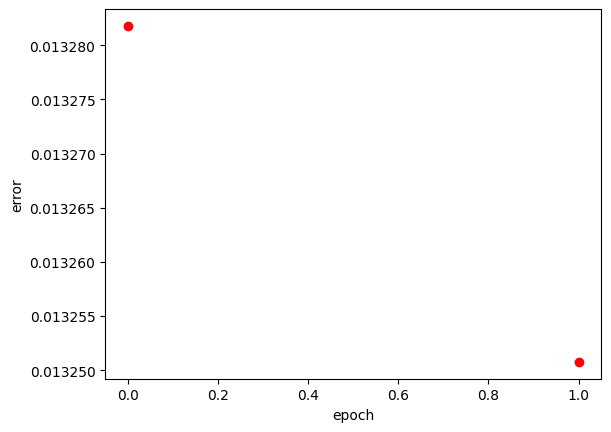

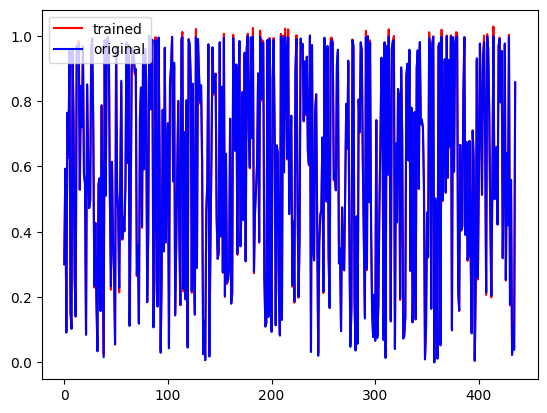

In [ ]:

# Predecir en los datos de prueba
predictions = predict(anfis_model, X_test)


# Calcular el error RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"RMSE en los datos de prueba: {rmse}")

# 5. Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions, color='blue', label='Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)],
         color='red', linestyle='--', label='Ideal')
plt.xlabel("Happiness Score Real")
plt.ylabel("Happiness Score Predicho")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.show()

# 6. Graficar errores durante el entrenamiento
anfis_model.plotErrors()
anfis_model.plotResults()


### Dataset recortado

In [ ]:
#Dataset Entrenamiento
from sklearn.preprocessing import MinMaxScaler

df_recortado = pd.read_csv('/content/drive/MyDrive/happiness/train.csv')
df_recortado = df_recortado.drop(['Month', 'Traffic_Density', 'City'], axis=1)

#eliminar valores de happiness negativos
df_recortado = df_recortado[df_recortado['Happiness_Score'] >= 1]


#normalizar variables en escala de 0 a 1
cols_to_norm = [col for col in df_recortado.columns if col != 'Year']
scaler = MinMaxScaler()
df_recortado[cols_to_norm] = scaler.fit_transform(df_recortado[cols_to_norm])


In [ ]:
#Dataset prueba
df_test = pd.read_csv('/content/drive/MyDrive/happiness/test.csv')
df_test = df_test.drop(['Month', 'Traffic_Density', 'City'], axis=1)
df_test[cols_to_norm] = scaler.transform(df_test[cols_to_norm])  # Usamos transform, no fit_transform


#### Ajuste iterativo de las reglas

In [ ]:
# Variables de entrada y salida
inputs = ['Decibel_Level', 'Green_Space_Area', 'Air_Quality_Index',
          'Cost_of_Living_Index', 'Healthcare_Index']
output = 'Happiness_Score'

X_train = df_recortado[inputs].values
Y_train = df_recortado[output].values
X_test = df_test[inputs].values
Y_test = df_test[output].values


# Crear las funciones de membresía
mfc = MemFuncs(mf)

# Inicializar el modelo ANFIS
anfis_model = ANFIS(X_train, Y_train.flatten(), mfc)

# Entrenar el modelo (método híbrido)

anfis_model.trainHybridJangOffLine(epochs=2)

print("-----")

current error:  0.13900122309692733
-----


#### Reglas inferidas

In [ ]:

# Extraer e imprimir las reglas
anfis_model.extract_rules_with_outputs(inputs, output)


Reglas inferidas por ANFIS:
Regla 1: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Bajo Y Healthcare_Index ES Bajo => Happiness_Score ES Bajo
Regla 2: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Bajo Y Healthcare_Index ES Medio => Happiness_Score ES Bajo
Regla 3: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Bajo Y Healthcare_Index ES Alto => Happiness_Score ES Bajo
Regla 4: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Medio Y Healthcare_Index ES Bajo => Happiness_Score ES Bajo
Regla 5: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Index ES Bajo Y Cost_of_Living_Index ES Medio Y Healthcare_Index ES Medio => Happiness_Score ES Medio
Regla 6: SI Decibel_Level ES Bajo Y Green_Space_Area ES Pequeño Y Air_Quality_Inde

#### Evaluar

RMSE en los datos de prueba: 0.010214230428854328


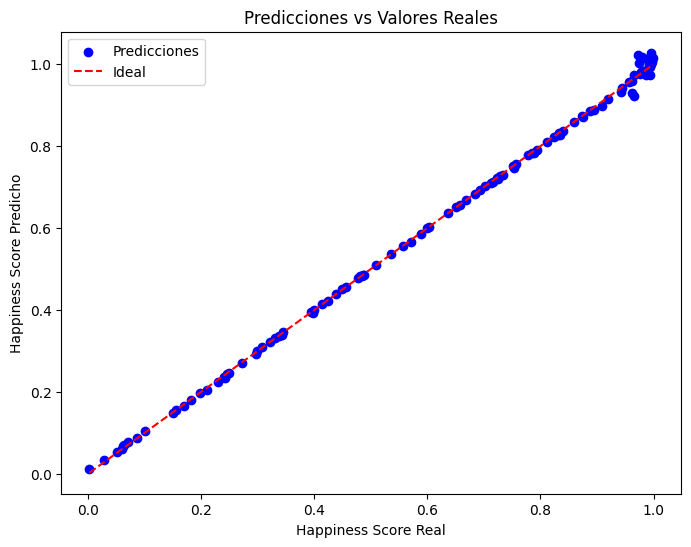

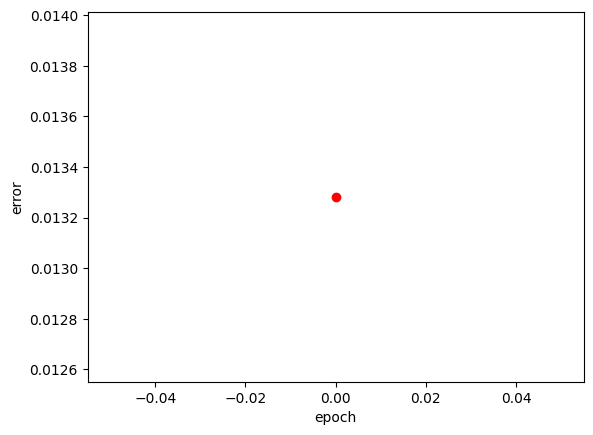

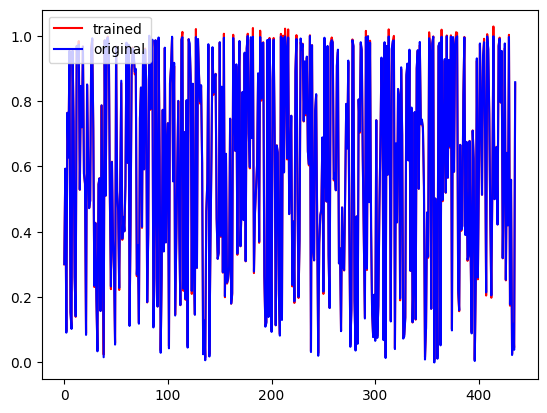

In [ ]:
# 4. Evaluar el modelo ANFIS
# Predecir en los datos de prueba
predictions = predict(anfis_model, X_test)


# Calcular el error RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"RMSE en los datos de prueba: {rmse}")

# 5. Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions, color='blue', label='Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)],
         color='red', linestyle='--', label='Ideal')
plt.xlabel("Happiness Score Real")
plt.ylabel("Happiness Score Predicho")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.show()

# 6. Graficar errores durante el entrenamiento
anfis_model.plotErrors()
anfis_model.plotResults()
